## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

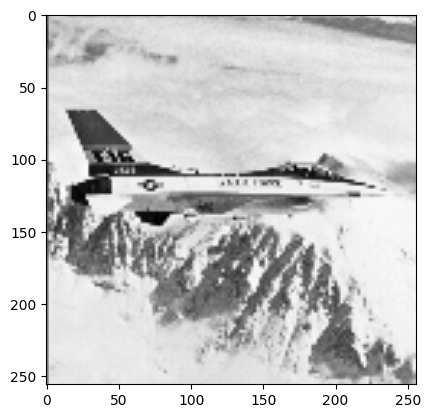

In [ ]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/"
fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

I = cv2.imread(fileName)
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I, 'gray')

In [ ]:
def bbhe(I):
  H = cv2.calcHist([I.astype("uint8")], [0], None, [255], [0, 255])
  mean_val = int(np.mean(I.astype("uint8")))

  print(mean_val)

  H1 = H[H <= mean_val]
  H2 = H[H > mean_val]

  C2 = H1.cumsum()
  C1 = H2.cumsum()

  C1 = C1 * mean_val / C1.max()
  C2 = (C2 / C2.max() * (255 - mean_val - 1) + 1 + mean_val)

  image_lut = np.concatenate((C1, C2))
  image_lut = np.concatenate((image_lut, np.zeros(256 - len(image_lut))))

  I = cv2.LUT(I.astype("uint8"), image_lut.astype("uint8"))
  I = cv2.normalize(I, I, 0, 255, cv2.NORM_MINMAX)

  return I

169


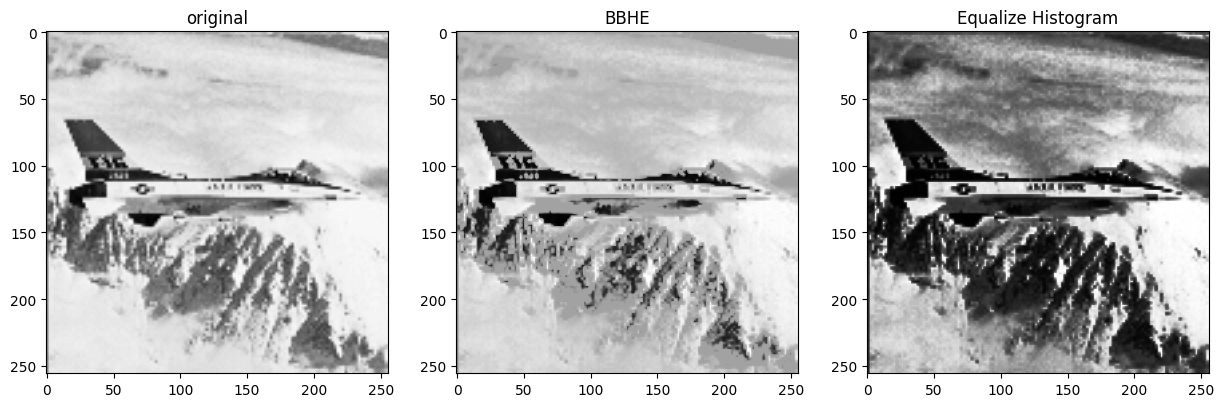

In [ ]:
img_bbhe = bbhe(I)
img_he = cv2.equalizeHist(I)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
f.set_size_inches(15, 8)
ax1.imshow(I, 'gray')
ax1.set_title("original")
ax2.imshow(img_bbhe, 'gray')
ax2.set_title("BBHE")
ax3.imshow(img_he, 'gray')
ax3.set_title("Equalize Histogram")
f.show()